# Working with Time-Series Data in a Consistent Bayesian Framework: 
## A Brief Introduction
---

Copyright 2018
Michael Pilosov

---
## Defining the Parameter to Observables (PtO) and Quantity of Interest (QoI) maps

---
Consider the Initival Value Problem (IVP)

$$
\begin{cases}
    \dot{u}(t) = -u(t), & t>0 \\
    u(0) = \lambda, & 
\end{cases}
$$

with solution $u(t;\lambda) = \lambda \,e^{-t}$.

Let $0<t_0<t_1<\ldots, t_K$ denote the observation times. 
Given a fixed initial condition (i.e., parameter) $\lambda$, let $y_k$ denote the set of (noisy) observations of the state variable $u(t_k,\lambda)$ for $k=0,1,\ldots, K$. 

We make the standard assumption of an additive error model with independent identically distributed noise, i.e., for each $k=0,1,\ldots,K$ and fixed value of $\lambda$, we assume that the Parameter-to-Observables (PtO) maps are given by

$$
O_k(\lambda) := u(t_k;\lambda) + \epsilon_k, \quad \epsilon_k \sim N(0,\sigma_k). 
$$

Assume that there is a true value of $\lambda$, which we denoted by $\lambda_0$, for which the observations $y_k:=O_k(\lambda_0)$ are given for $k=0,1,\ldots,K$.

Then, for any other value of $\lambda$ in the IVP above, we define the Quantity of Interest (QoI) as the **Weighted Sum Squared Error (a weighted 2-norm) between the observations and the model predictions**, i.e., we define the QoI map as

$$
    \boxed{Q(\lambda) := \sum_{k=0}^{K} \frac{(u(t_k;\lambda) - y_k) ^ 2}{\sigma_k^2}}
$$

We let $\mathcal{D} := Q(\Lambda)$ denote the space of all possible observations of mean squared error. 


---
## Formulating the Inverse Problem:
---
### Prior Information/Assumptions

* We assume that the true value $\lambda_0$ belongs to the parameter space defined by $\Lambda:= [0, 2]$.


* Prior to the data $\{y_k\}_{k=0}^K$ being available, any value of the parameter $\lambda$ in $\Lambda$ is assumed to be equally likely. In other words, we take $\pi^{prior}_\Lambda(\lambda)$ to be a uniform density.


### The Observed Density

* For the true value of $\lambda_0$, we have that $u(t_k;\lambda_0)-y_k = \epsilon_k$ for each $k$. Thus, the observed density on $\mathcal{D}$, denoted by $\pi^{obs}_{\mathcal{D}}(d)$, is given by a $\chi^2_{K+1}$ distribution.

### The Posterior Density

* Let $\pi^{O(prior)}_{\mathcal{D}}(d)$ denote the push-forward of the prior density onto $\mathcal{D}$. Then, the posterior density on $\Lambda$ is given by

$$
    \pi^{post}_\Lambda(\lambda) := \pi^{prior}_\Lambda(\lambda)\frac{\pi^{obs}_{\mathcal{D}}(Q(\lambda))}{\pi^{O(prior)}_{\mathcal{D}}(Q(\lambda))}
$$

---
## The numerical implementation and practical considerations
---
Here, we provide only a few brief remarks on the implementation.
For a step-by-step walkthrough, please see the CBayes_TS.ipynb file.
Below you will find an all-in-one version. 

***Some useful remarks go here.***

* In the `sandbox` function below, `T` is an interval of observation times



--- 

### Import Libraries
_(should be 2.7 and 3.x compatible) _

In [1]:
# Interactivity
from cb_sandbox import *
%matplotlib inline

---

# All-in-One Sandbox!
_Run the cells below to start experimenting_

Tab(children=(HBox(children=(VBox(children=(Accordion(children=(HBox(children=(VBox(children=(FloatRangeSlider(value=(3.0, 6.0), continuous_update=False, description='$\\Lambda \\in$', max=7.0, min=2.0, step=0.5), FloatSlider(value=4.5, continuous_update=False, description='IC: $\\lambda_0$', max=6.0, min=3.0), FloatSlider(value=0.5, continuous_update=False, description='$t_0$ =', max=2.0, min=0.1, step=0.05), FloatSlider(value=0.1, continuous_update=False, description='$\\Delta_t$ =', max=0.5, min=0.05, readout_format='1.2e', step=0.05), IntSlider(value=50, continuous_update=False, description='# Obs. =', min=1)), layout=Layout(justify_content='center')), VBox(children=(Text(value='Model Options', disabled=True), Checkbox(value=False, description='Fixed Noise Model'), Checkbox(value=False, description='Fixed Obs. Window'), IntSlider(value=0, continuous_update=False, description='Fun. Choice', max=1), Text(value='Plotting Options', disabled=True), Checkbox(value=False, description='Observed v. Q(Post)'), Checkbox(value=False, description='Smooth Posterior'))), HBox(children=(IntSlider(value=1500, continuous_update=False, description='Samples $N$', max=25000, min=500, orientation='vertical', step=500), IntSlider(value=1, continuous_update=False, description='Num. Trials', max=25, min=1, orientation='vertical'), FloatSlider(value=0.25, continuous_update=False, description='$\\sigma$', max=1.75, min=0.05, orientation='vertical', step=0.05)), layout=Layout(justify_content='center'))), layout=Layout(justify_content='center')),), layout=Layout(justify_content='center'), _titles={'0': 'UQ Sandbox'}), Output()), layout=Layout(justify_content='center')),)),), _titles={'0': 'Experiment 0'})

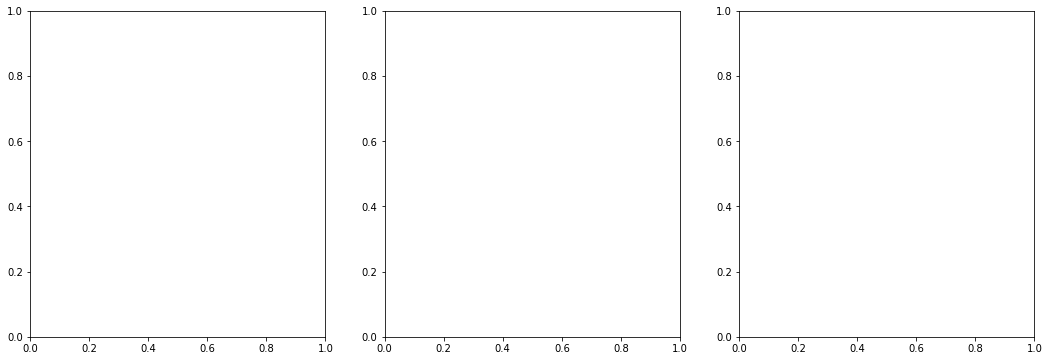

In [2]:
# Display the "tabulated nest"
num_experiments = 1
tab_nest, keys, fbox = make_tabulated_sandbox(num_experiments)
tab_nest

Once you find some parameters you like, you can run multiple instances of it below to get a sense of the variations in the solutions:



In [3]:
from ipywidgets import interact_manual

In [4]:
interact_manual(sandbox, 
        num_samples = widgets.IntSlider(value=2500, 
            min=int(5E2), max=int(5E4), step=500, description='Samp. $N$ ='), 
        lam_bound = widgets.FloatRangeSlider(value=[3.0, 6.0], 
            min=2.0, max = 7.0, step=0.5, description='Param $\Lambda \in$'),
        lam_0 = widgets.FloatSlider(value=3.5, 
            min=2.0, max=7.0, step=0.1, description='IC: $\lambda_0$ ='), 
        t_0 = widgets.FloatSlider(value=0.5, 
            min=0.1, max=2, step=0.1, description='$t_0$ ='),
        Delta_t = widgets.FloatSlider(value=0.1, 
            min=0.05, max=0.5, step=0.05, description='$\Delta_t$ ='),
        num_observations = widgets.IntSlider(value=50, 
            min=1, max=100, description='# of Obs. ='), 
        sd = widgets.FloatSlider(value=0.1, 
            min=0.05, max=0.25, step=0.01, description='Constant $\sigma$:'), 
        fixed_noise=widgets.fixed(True), 
        compare = widgets.fixed(False),
        smooth_post = widgets.fixed(False)); 

interactive(children=(IntSlider(value=2500, description='Samp. $N$ =', max=50000, min=500, step=500), FloatRangeSlider(value=(3.0, 6.0), description='Param $\\Lambda \\in$', max=7.0, min=2.0, step=0.5), FloatSlider(value=3.5, description='IC: $\\lambda_0$ =', max=7.0, min=2.0), FloatSlider(value=0.5, description='$t_0$ =', max=2.0, min=0.1), FloatSlider(value=0.1, description='$\\Delta_t$ =', max=0.5, min=0.05, step=0.05), IntSlider(value=50, description='# of Obs. =', min=1), FloatSlider(value=0.1, description='Constant $\\sigma$:', max=0.25, min=0.05, step=0.01), IntSlider(value=0, description='fun_choice', max=1), IntSlider(value=1, description='num_trials', max=3, min=-1), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

---

### Suggestions

- Increase $N$ and watch the Pushforward of the Prior change/converge.
- If you broaden the standard deviation $\sigma$, we suggest to also broaden the bound on the parameter space $\Lambda$ in order to avoid voilating the predictability assumption.
- Notice the relationship between the bound on the interval we are inverting for the Mean Squared Error and the support of the posterior.
- The same happens as you increase $\sigma$.
- Change the initial condition $\lambda_0$ and watch the posterior distribution follow the slider.



- Fix the number of observations to 1 and change the interval over which the observation is being made (with $K=0$, the observation occurs only at $T_0$). Notice the diminishing returns as you wait to make your measurement. 
- Fix some interval and change the number of observations made during this time period.
- Fix a number of observations (several) and fix $T_0$ while changing $T$ to observe another example of diminshing returns.

### Observations

- Entropy barely changes as $\lambda_0$ moves around. Increases a bit near boundary of $\Lambda$ (likely due to predictability assumption being violated)
- For a wide time measurement window, entropy increases with the number of observations (d.o.f.)
- Widening $\Lambda$ decreases entropy, obviously enlarges $\mathcal{D}$, support of $P_\mathcal{D}$.
- If you narrow the window, the entropy decreases.
- As the window slides earlier in time, the entropy decreases.
- Higher MSE threshold ($\epsilon$, support of observed density) means higher entropy.
- Higher variance means higher entropy. We might run a suite of $\sigma$s MADS-style to study the robustness of a design. 
    - perhaps if we try to minimize entropy (maximize information gain), we look for designs that are less sensitive to the choice of $\sigma$s, which would **correspond to an experimental design that is robust to measurement uncertainty.**
- Increasing the number of samples $N$ increases entropy quite a bit. Would like to figure out a way to control for this? _Is it even right to be using `scipy.stats.entropy`?_